<a href="https://colab.research.google.com/github/Anup910/Credit_Risk_Classification/blob/main/Credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Dataset

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('credit_risk_data.csv')

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# EDA

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


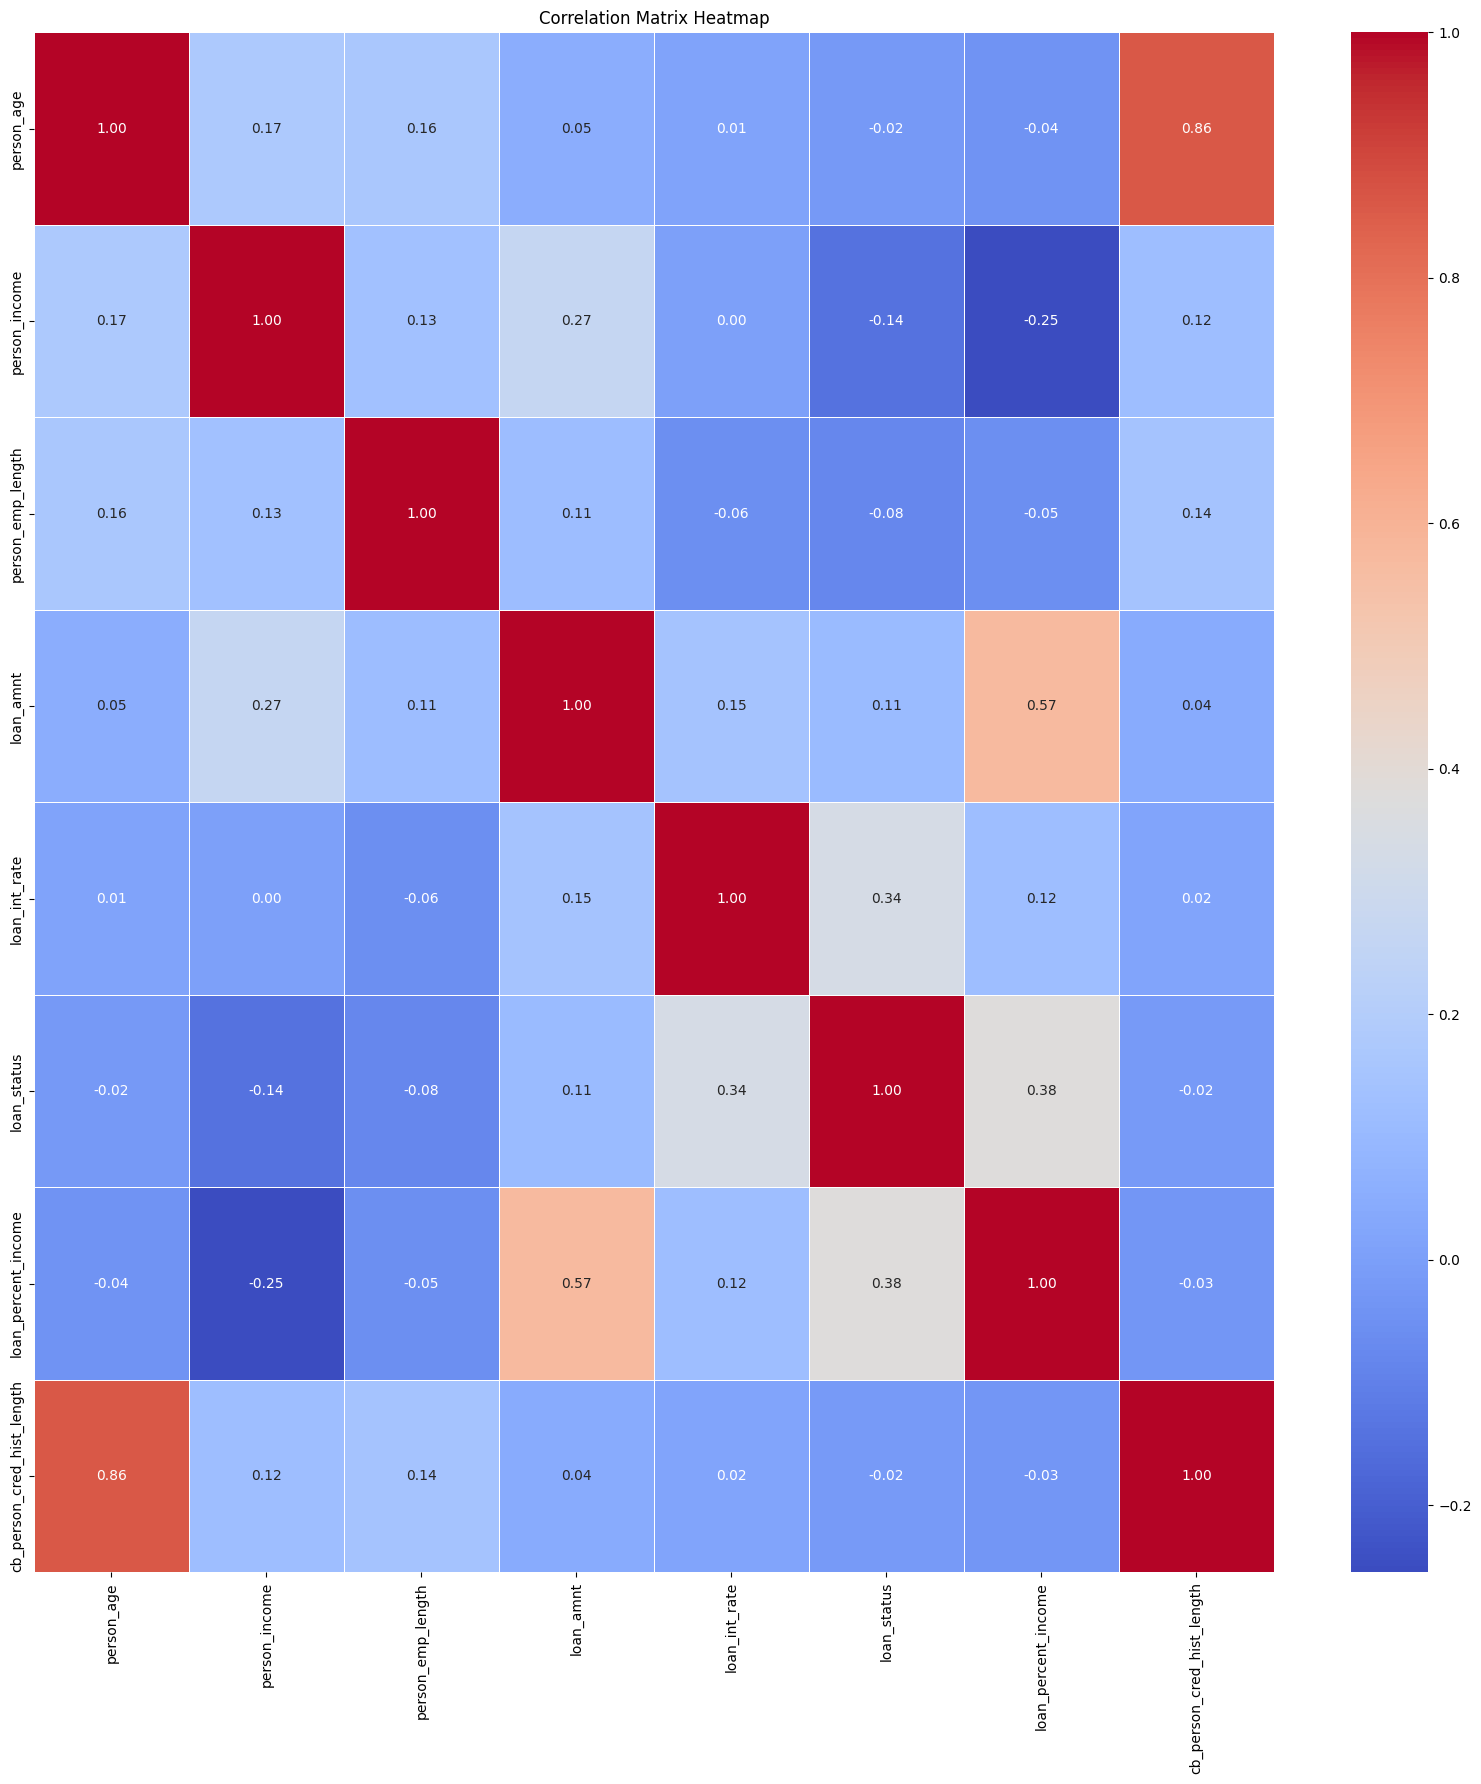

In [ ]:
# Assuming df is DataFrame
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Compute correlation matrix

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Countplot for Categorical Varibales

Text(0.5, 1.0, 'Loan Status')

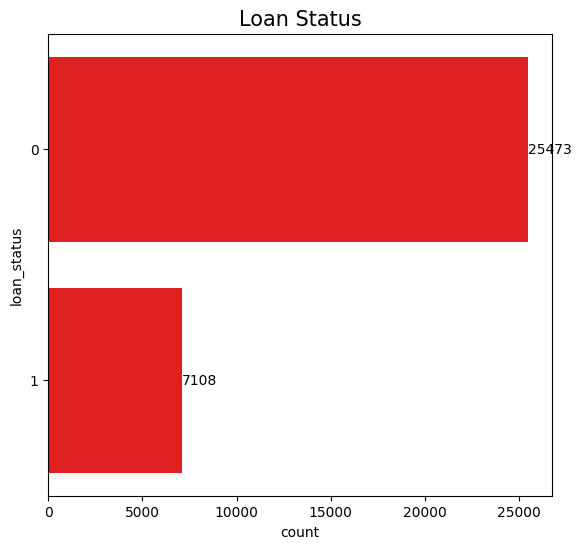

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.loan_status, color = 'r')
ax1.bar_label(container = ax1.containers[0], labels = df['loan_status'].value_counts())
ax1.set_title('Loan Status',fontsize = 15 )

Text(0.5, 1.0, 'Home Ownership')

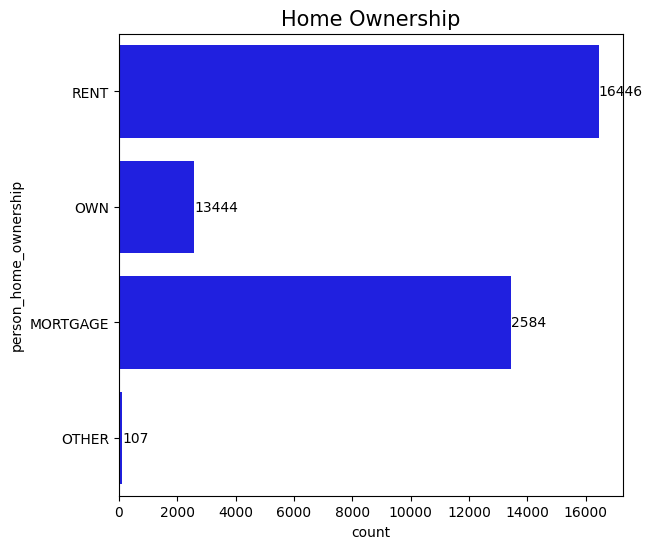

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.person_home_ownership, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['person_home_ownership'].value_counts())
ax1.set_title('Home Ownership',fontsize = 15 )

Text(0.5, 1.0, 'Loan Intent')

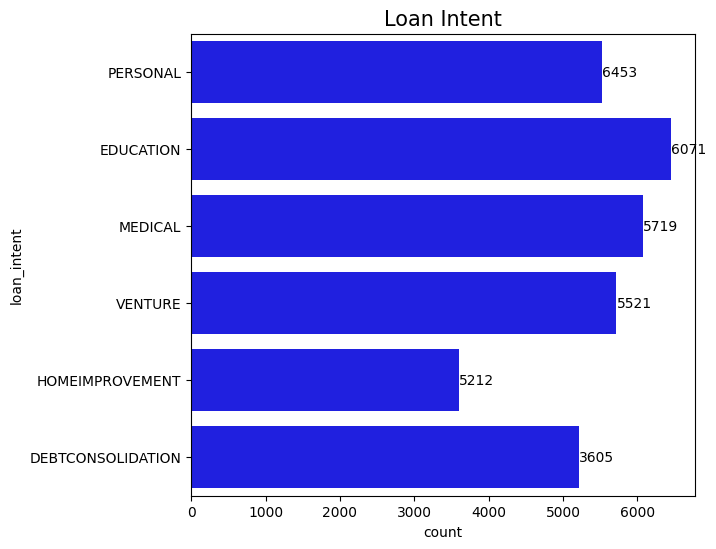

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.loan_intent, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['loan_intent'].value_counts())
ax1.set_title('Loan Intent',fontsize = 15 )

Text(0.5, 1.0, 'Loan Grade')

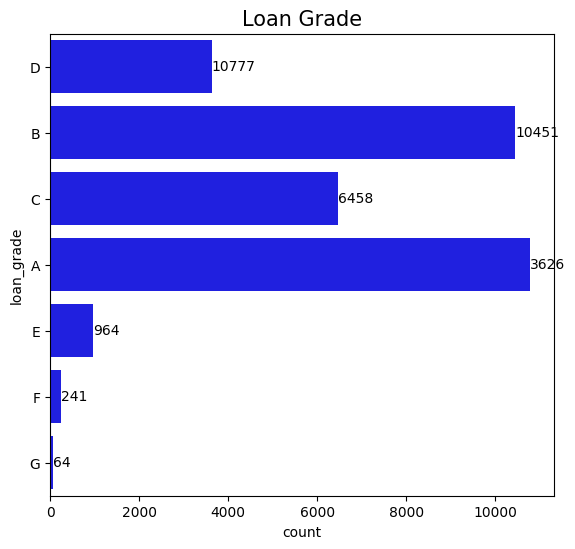

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.loan_grade, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['loan_grade'].value_counts())
ax1.set_title('Loan Grade',fontsize = 15 )

Text(0.5, 1.0, 'Historical Default')

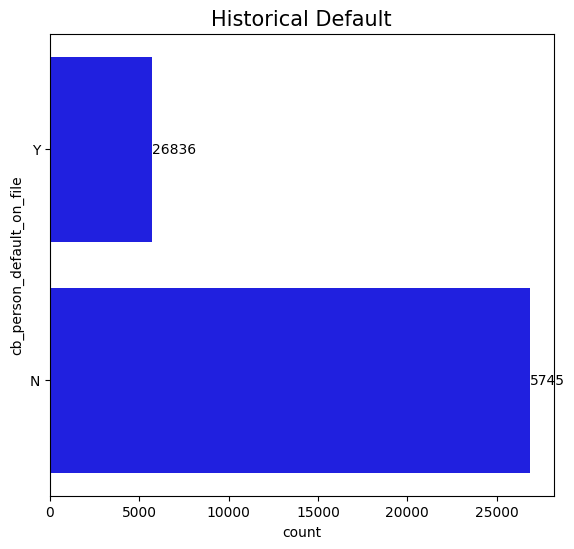

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.cb_person_default_on_file, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['cb_person_default_on_file'].value_counts())
ax1.set_title('Historical Default',fontsize = 15 )

## Boxplot for Numerical Variables

Text(0.5, 1.0, 'Age')

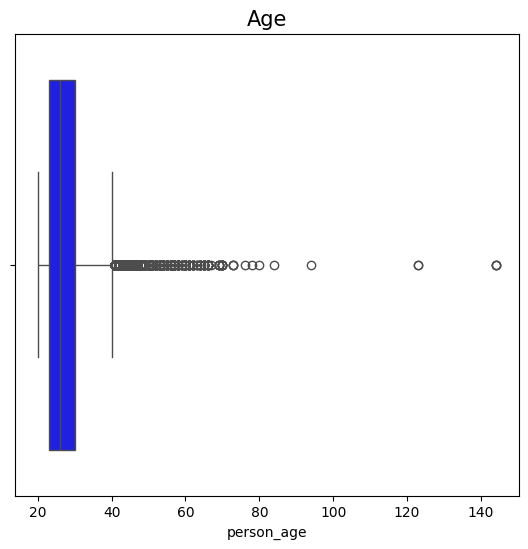

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.person_age, color = 'b')
ax1.set_title('Age',fontsize = 15 )

Text(0.5, 1.0, 'Annual Income')

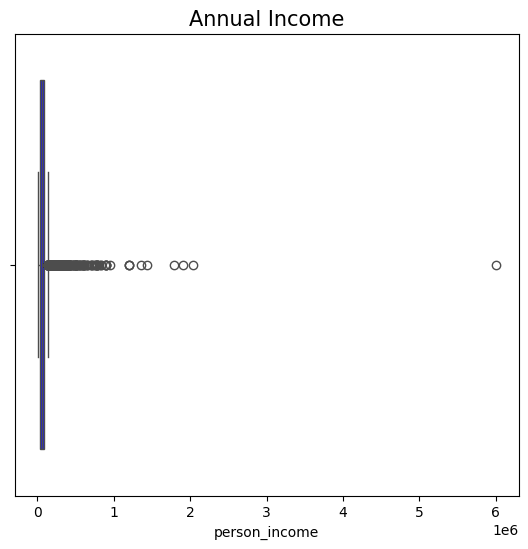

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.person_income, color = 'b')
ax1.set_title('Annual Income',fontsize = 15 )

Text(0.5, 1.0, 'Employment Length (in years)')

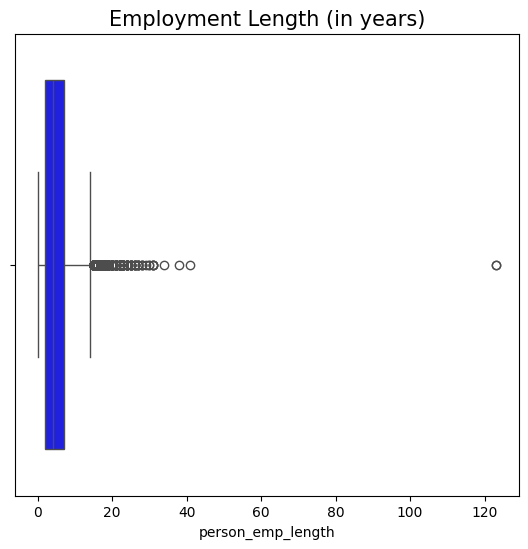

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.person_emp_length, color = 'b')
ax1.set_title('Employment Length (in years)',fontsize = 15 )

Text(0.5, 1.0, 'Loan Amount')

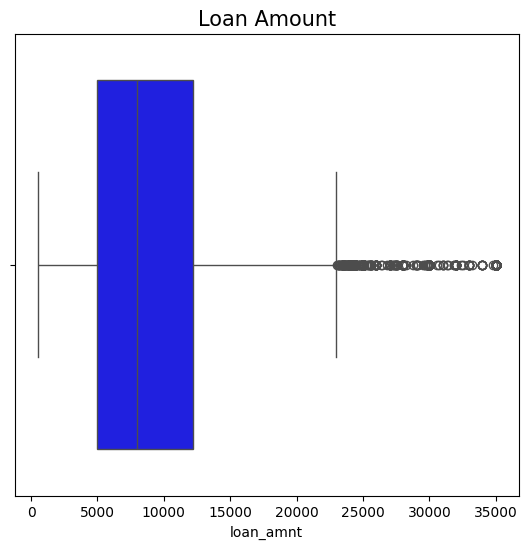

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.loan_amnt, color = 'b')
ax1.set_title('Loan Amount',fontsize = 15 )

Text(0.5, 1.0, 'Interest Rate')

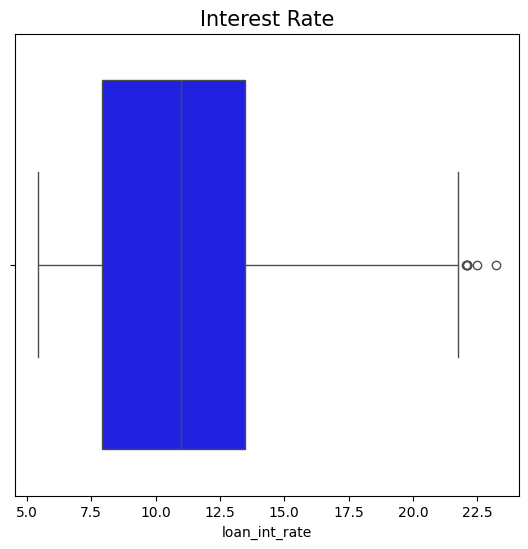

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.loan_int_rate, color = 'b')
ax1.set_title('Interest Rate',fontsize = 15 )

Text(0.5, 1.0, 'Percent Income')

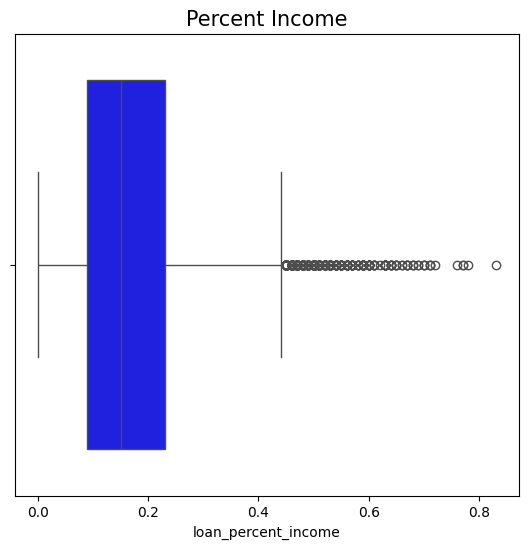

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.loan_percent_income, color = 'b')
ax1.set_title('Percent Income',fontsize = 15 )

Text(0.5, 1.0, 'Credit History Length')

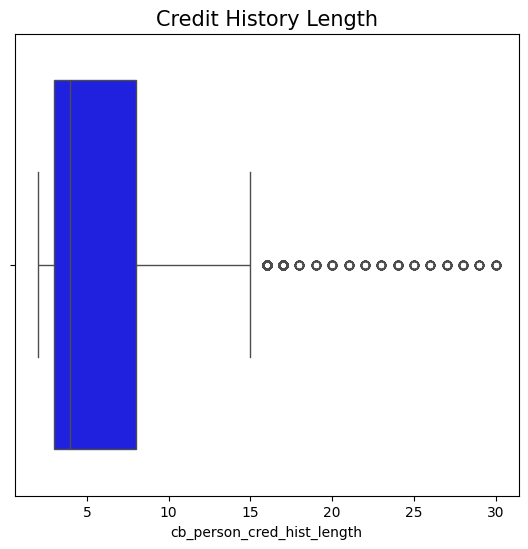

In [ ]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.cb_person_cred_hist_length, color = 'b')
ax1.set_title('Credit History Length',fontsize = 15 )

# Pre-Processing

## Imputing Missing Values

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Calculating percentage of missing values
df.person_emp_length.isnull().sum()*100/ len(df.person_emp_length)

2.7469997851508547

In [ ]:
# Calculating percentage of missing values
df.loan_int_rate.isnull().sum()*100/ len(df.person_emp_length)

9.563856235229121

In [ ]:
# Dropping the null values of employment length
df.dropna(subset = ['person_emp_length'], inplace = True)

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3048
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Calculating percentage of missing values
df.loan_int_rate.isnull().sum()*100/ len(df.person_emp_length)

9.619390266994888

In [ ]:
#Replace the na values with the mean of the Interest rate
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 31686 non-null  object 
 5   loan_grade                  31686 non-null  object 
 6   loan_amnt                   31686 non-null  int64  
 7   loan_int_rate               31686 non-null  float64
 8   loan_status                 31686 non-null  int64  
 9   loan_percent_income         31686 non-null  float64
 10  cb_person_default_on_file   31686 non-null  object 
 11  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


## Managing Extreme Outliers

In [ ]:
index_age = df[df['person_age']>100].index
df.drop(index_age, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31681 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31681 non-null  int64  
 1   person_income               31681 non-null  int64  
 2   person_home_ownership       31681 non-null  object 
 3   person_emp_length           31681 non-null  float64
 4   loan_intent                 31681 non-null  object 
 5   loan_grade                  31681 non-null  object 
 6   loan_amnt                   31681 non-null  int64  
 7   loan_int_rate               31681 non-null  float64
 8   loan_status                 31681 non-null  int64  
 9   loan_percent_income         31681 non-null  float64
 10  cb_person_default_on_file   31681 non-null  object 
 11  cb_person_cred_hist_length  31681 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [ ]:
index_age = df[df['person_emp_length']>100].index
df.drop(index_age, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31679 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31679 non-null  int64  
 1   person_income               31679 non-null  int64  
 2   person_home_ownership       31679 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 31679 non-null  object 
 5   loan_grade                  31679 non-null  object 
 6   loan_amnt                   31679 non-null  int64  
 7   loan_int_rate               31679 non-null  float64
 8   loan_status                 31679 non-null  int64  
 9   loan_percent_income         31679 non-null  float64
 10  cb_person_default_on_file   31679 non-null  object 
 11  cb_person_cred_hist_length  31679 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [ ]:
index_age = df[df['person_income']>500000].index
df.drop(index_age, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31628 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31628 non-null  int64  
 1   person_income               31628 non-null  int64  
 2   person_home_ownership       31628 non-null  object 
 3   person_emp_length           31628 non-null  float64
 4   loan_intent                 31628 non-null  object 
 5   loan_grade                  31628 non-null  object 
 6   loan_amnt                   31628 non-null  int64  
 7   loan_int_rate               31628 non-null  float64
 8   loan_status                 31628 non-null  int64  
 9   loan_percent_income         31628 non-null  float64
 10  cb_person_default_on_file   31628 non-null  object 
 11  cb_person_cred_hist_length  31628 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


# Encoding Categorical Variables

In [ ]:
df.shape

(31628, 12)

In [ ]:
df = pd.get_dummies(df, drop_first = True).replace({False:0,True:1})

In [ ]:
df.shape

(31628, 23)

In [ ]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


# Scaling Numerical Variables

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,...,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000
mean,27.711901,65271.727204,4.778013,9655.031934,11.039836,0.215600,0.169855,5.797331,0.003320,0.076072,...,0.186006,0.169280,0.175383,0.321361,0.199475,0.112242,0.030068,0.007462,0.002024,0.177596
std,6.191255,40925.472381,4.031300,6328.769604,3.070966,0.411245,0.106178,4.045747,0.057523,0.265117,...,0.389118,0.375005,0.380300,0.467006,0.399612,0.315669,0.170778,0.086060,0.044939,0.382178
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,39234.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,55783.000000,4.000000,8000.000000,11.039867,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,80000.000000,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,500000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [ ]:
df = pd.DataFrame(df, columns=[cols])

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,...,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000
mean,0.104215,0.123532,0.116537,0.265363,0.315721,0.215600,0.194945,0.135619,0.003320,0.076072,...,0.186006,0.169280,0.175383,0.321361,0.199475,0.112242,0.030068,0.007462,0.002024,0.177596
std,0.083666,0.082511,0.098324,0.183443,0.172526,0.411245,0.129485,0.144491,0.057523,0.265117,...,0.389118,0.375005,0.380300,0.467006,0.399612,0.315669,0.170778,0.086060,0.044939,0.382178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040541,0.071036,0.048780,0.130435,0.172472,0.000000,0.097561,0.035714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.081081,0.104401,0.097561,0.217391,0.315723,0.000000,0.170732,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.135135,0.153226,0.170732,0.347826,0.434831,0.000000,0.268293,0.214286,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-Test Split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['loan_status'])

In [ ]:
X_train = train.drop(["loan_status"], axis=1)
y_train = train["loan_status"]
X_test = test.drop(["loan_status"], axis=1)
y_test = test["loan_status"]

print(X_train.shape)
print(X_test.shape)

(25302, 22)
(6326, 22)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(25302, 1)
(6326, 1)


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(4,10))
param_grid = {'n_neighbors': k_range}
cv_knn = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')

cv_knn.fit(X_train, y_train)

print(cv_knn.best_params_)
print(cv_knn.best_score_)

{'n_neighbors': 7}
0.8969252260116842


In [ ]:
y_pred = cv_knn.predict(X_test)
cv_knn.score(X_test, y_test)

0.9010433133101486

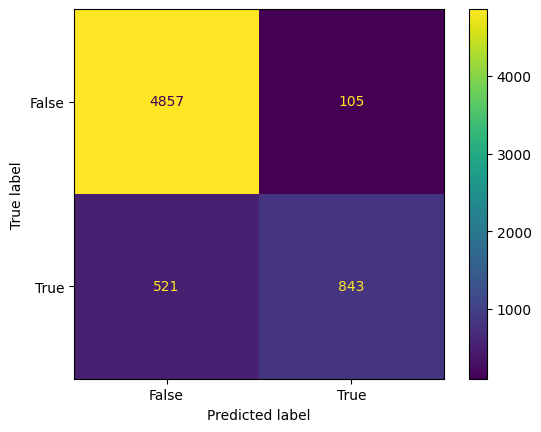

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred))
print("Recall:: ", recall_score(y_test, y_pred))

Accuracy:  0.9010433133101486
Precision::  0.8892405063291139
Recall::  0.6180351906158358


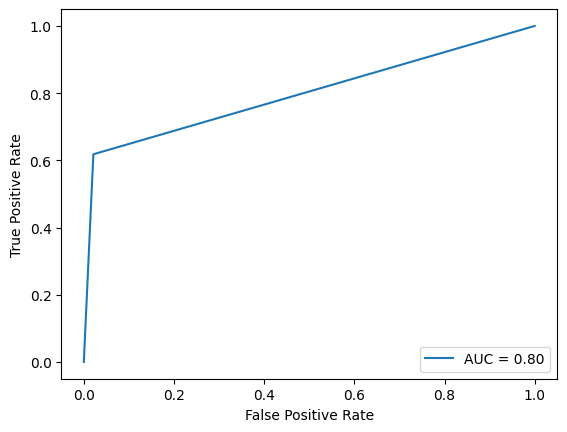

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [ ]:
#For our application, the number of missed defaults (bottom left) needs to be minimized to save loss and
#the number of correctly predicted settled loans (top left) needs to be maximized in order to maximize the earned interest.
#Hence, our focus is on recall.

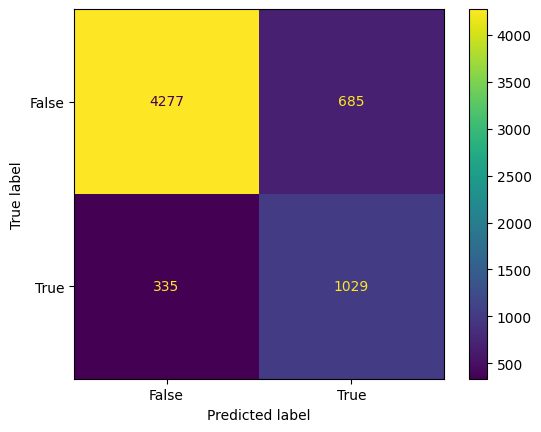

In [ ]:
threshold = 0.2
y_pred = (cv_knn.predict_proba(X_test)[:, 1] > threshold).astype('float')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred))
print("Recall:: ", recall_score(y_test, y_pred))

Accuracy:  0.8387606702497629
Precision::  0.6003500583430572
Recall::  0.7543988269794721


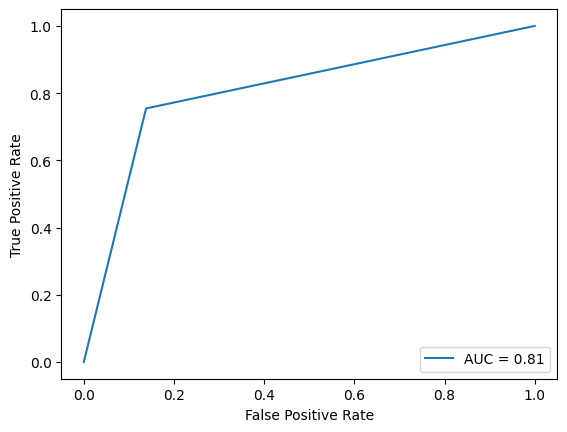

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth' : list(range(5,15)), 'criterion' :['gini', 'entropy']}
cv_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

cv_dtree.fit(X_train, y_train)

print(cv_dtree.best_params_)
print(cv_dtree.best_score_)

{'criterion': 'entropy', 'max_depth': 11}
0.9274368112089928


In [ ]:
y_pred1 = cv_dtree.predict(X_test)
cv_dtree.score(X_test, y_test)

0.9302877015491622

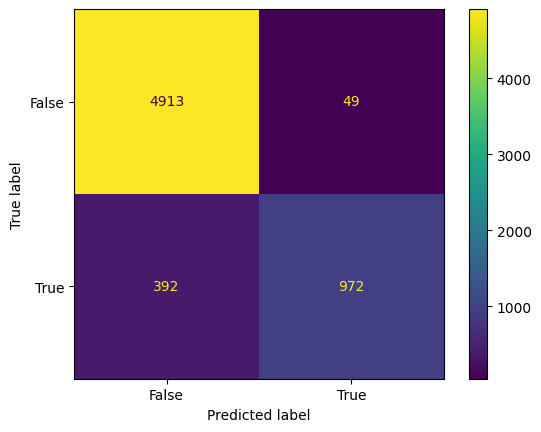

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred1))
print("Precision:: ", precision_score(y_test, y_pred1))
print("Recall:: ", recall_score(y_test, y_pred1))

Accuracy:  0.9302877015491622
Precision::  0.9520078354554359
Recall::  0.7126099706744868


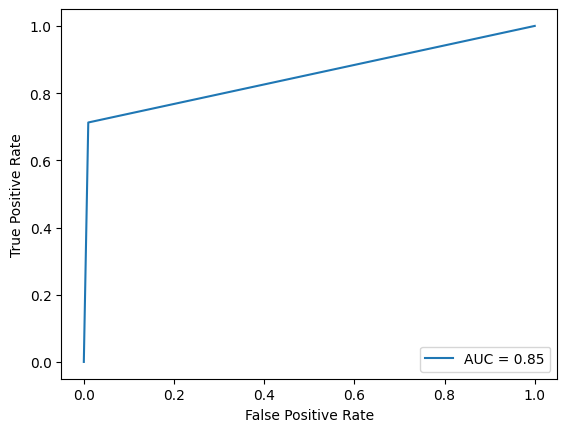

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

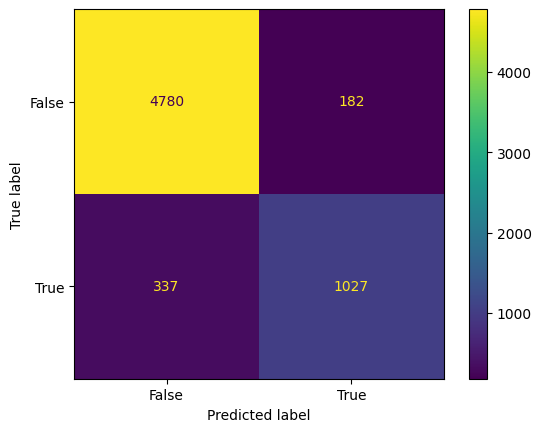

In [ ]:
threshold = 0.2
y_pred1 = (cv_dtree.predict_proba(X_test)[:, 1] > threshold).astype('float')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred1))
print("Precision:: ", precision_score(y_test, y_pred1))
print("Recall:: ", recall_score(y_test, y_pred1))

Accuracy:  0.917957635156497
Precision::  0.8494623655913979
Recall::  0.7529325513196481


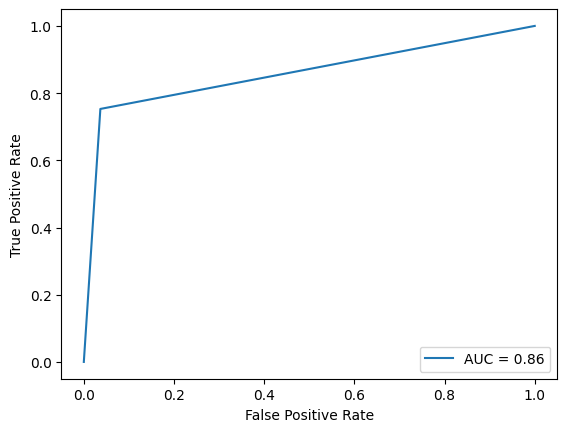

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 150, 200], 'max_depth' : list(range(7,14)), 'criterion' :['gini', 'entropy']}
cv_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)

cv_rf.fit(X_train, y_train)

print(cv_rf.best_params_)
print(cv_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 150}
0.9308750778879444


In [ ]:
y_pred2 = cv_rf.predict(X_test)
cv_rf.score(X_test, y_test)

0.9321846348403414

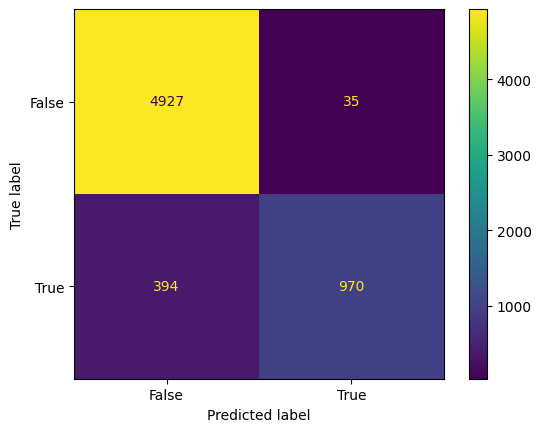

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("Precision:: ", precision_score(y_test, y_pred2))
print("Recall:: ", recall_score(y_test, y_pred2))

Accuracy:  0.9321846348403414
Precision::  0.9651741293532339
Recall::  0.7111436950146628


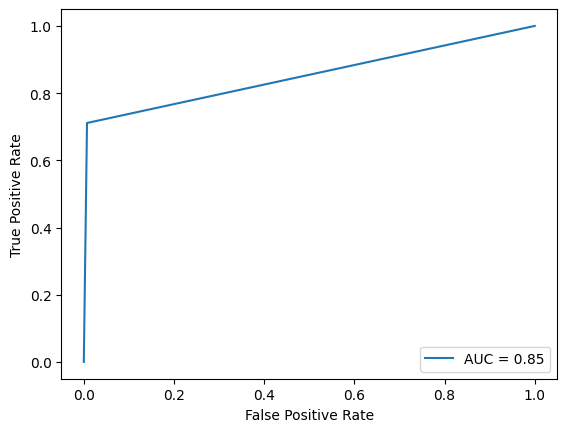

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

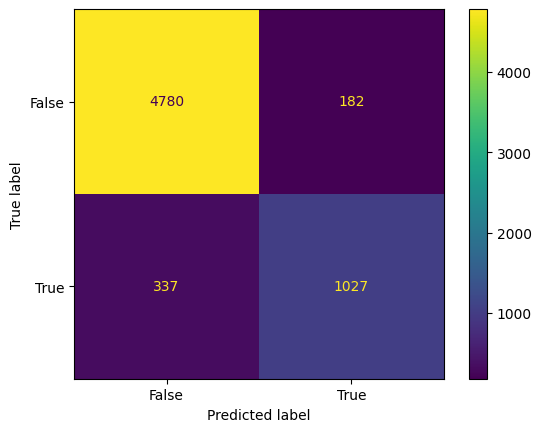

In [ ]:
threshold = 0.2
y_pred2 = (cv_dtree.predict_proba(X_test)[:, 1] > threshold).astype('float')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("Precision:: ", precision_score(y_test, y_pred2))
print("Recall:: ", recall_score(y_test, y_pred2))

Accuracy:  0.917957635156497
Precision::  0.8494623655913979
Recall::  0.7529325513196481


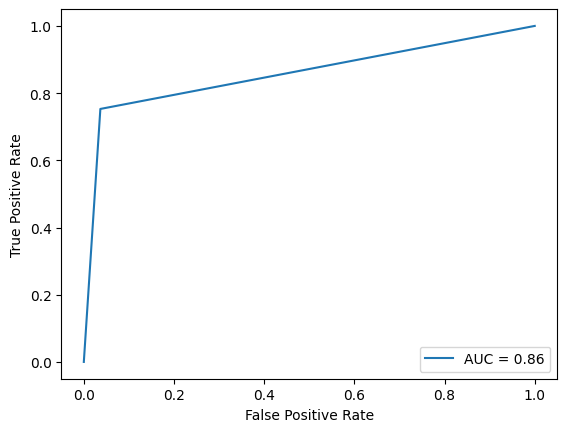

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()